# **CCEM Image processing #1**

Introduction to jupyter notebook ==> load, display and export data

In [ ]:
# To run only if using jupyter notebook through binder
# Install the required packages in Jupyter kernel (internet connection required)
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install imageio
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install matplotlib_scalebar

In [1]:
# Import the required packages
import numpy as np
import imageio as io
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

Links to libraries documentation
1. Numpy ==> <https://numpy.org/doc/stable/reference/index.html>
2. imageio ==> <https://imageio.readthedocs.io/en/stable/userapi.html>
3. matplotlib.pyplot ==> <https://matplotlib.org/stable/api/pyplot_summary.html>
4. matplotlib_scalebar ==> <https://pypi.org/project/matplotlib-scalebar/>

In [2]:
# Command to get some interactivity with the data plotted
%matplotlib notebook

## Simple plotting example

In [3]:
x = np.array([0, 1, 2, 3, 4, 5])

u = x
v = np.add(x, x) # v = 2*x
w = np.multiply(x, x) # w = x^2

print('x = ', x)
print('u = ', u)
print('v = ', v)
print('w = ', w)

x =  [0 1 2 3 4 5]
u =  [0 1 2 3 4 5]
v =  [ 0  2  4  6  8 10]
w =  [ 0  1  4  9 16 25]


<IPython.core.display.Javascript object>


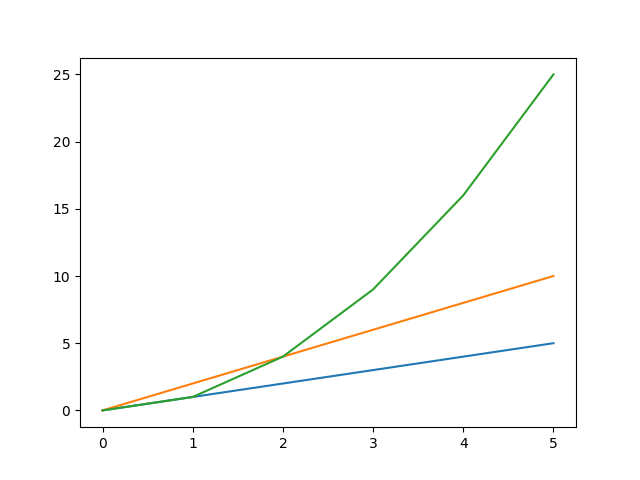

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, u)
ax.plot(x, v)
ax.plot(x, w)

plt.show()

<IPython.core.display.Javascript object>


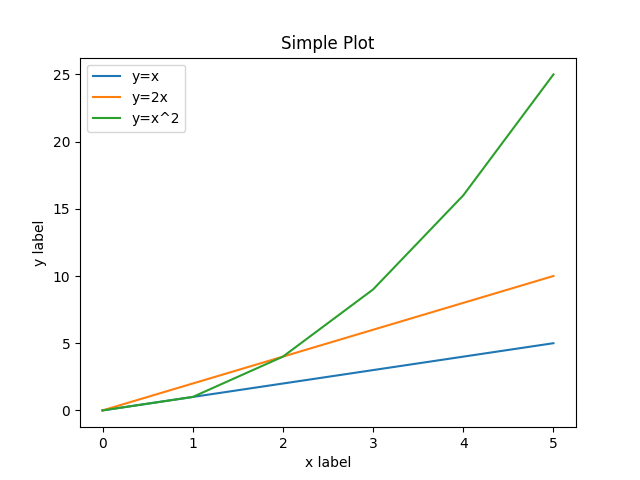

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, u, label='y=x')
ax.plot(x, v, label='y=2x')
ax.plot(x, w, label='y=x^2')
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the ax
ax.legend() # Add legend

plt.show()

*Exercise: plot the cosine fuction in [0;10]*

<IPython.core.display.Javascript object>


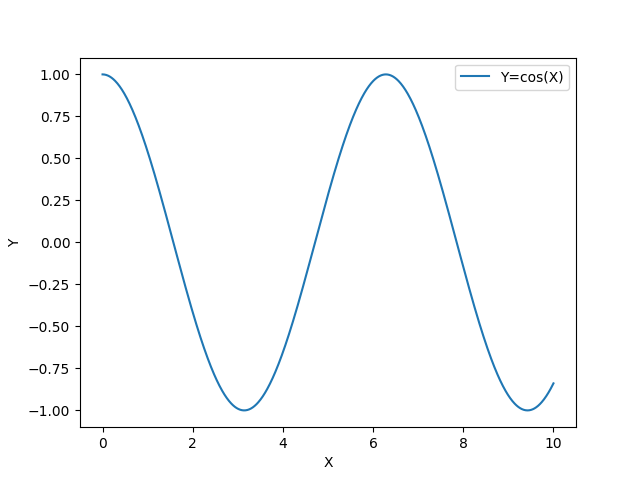

In [6]:
x = np.linspace(0,10,1000)
y = np.cos(x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot(x,y, label='Y=cos(X)')
ax.legend()

plt.show()

## Display image

1. Load image
2. Display 2D array
3. Display properties

In [7]:
# Load the data ==> Image .tif converted in a 2D numpy array

image = io.imread('Silicon_Ref_7M2_2048_demo.tif')
image_array = np.array(image)

In [8]:
print('Image')
print(image)
print(type(image))

print('\n')

print('Image array')
print(image_array)
print(type(image_array))

Image
[[18582 15919 12609 ... 16411 16946 16043]
 [18016 17194 16603 ... 18850 14836 17232]
 [17753 16192 15523 ... 16738 17746 18166]
 ...
 [11759 12074 10611 ... 10412 13092 10642]
 [13061 11690 10020 ... 11986 10393  9410]
 [11574 12363 11886 ... 13061 14173 12971]]
<class 'imageio.core.util.Array'>


Image array
[[18582 15919 12609 ... 16411 16946 16043]
 [18016 17194 16603 ... 18850 14836 17232]
 [17753 16192 15523 ... 16738 17746 18166]
 ...
 [11759 12074 10611 ... 10412 13092 10642]
 [13061 11690 10020 ... 11986 10393  9410]
 [11574 12363 11886 ... 13061 14173 12971]]
<class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


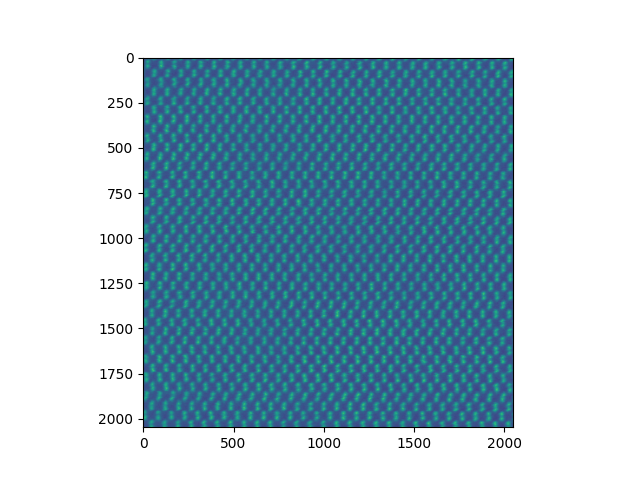

In [9]:
# Plot the data loaded

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(image_array)

plt.show()

<IPython.core.display.Javascript object>


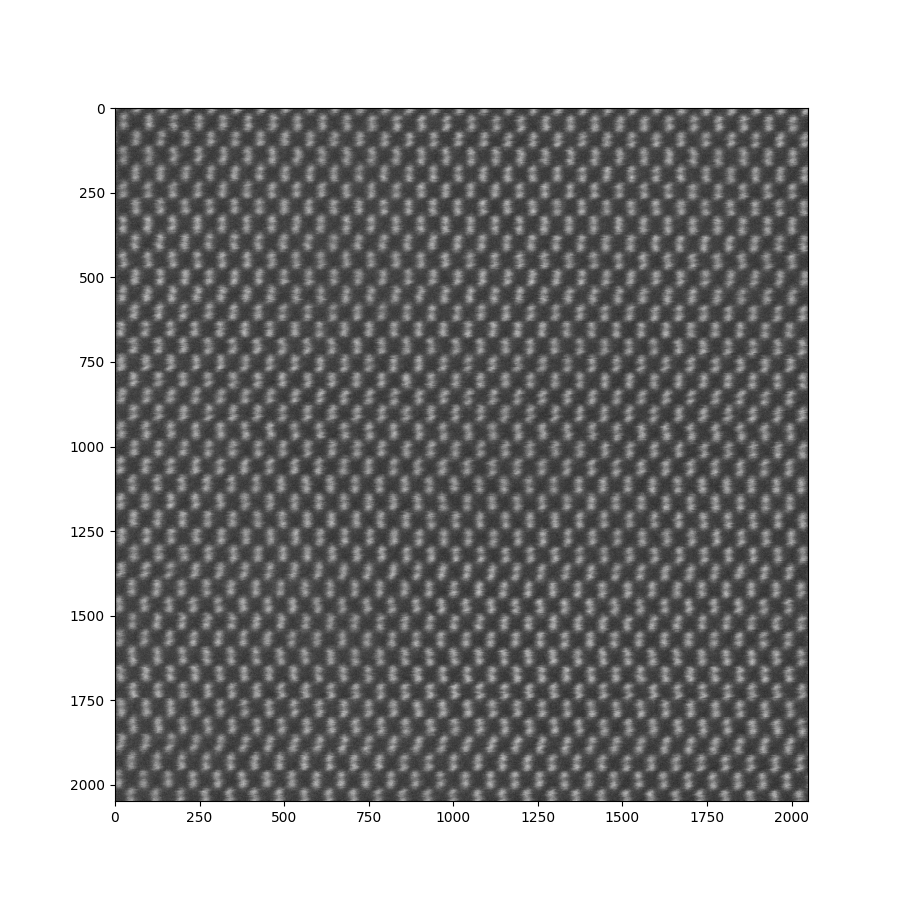

In [10]:
# Change size of the figure and select colourmap

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.imshow(image_array, cmap='gray')

plt.show()

<IPython.core.display.Javascript object>


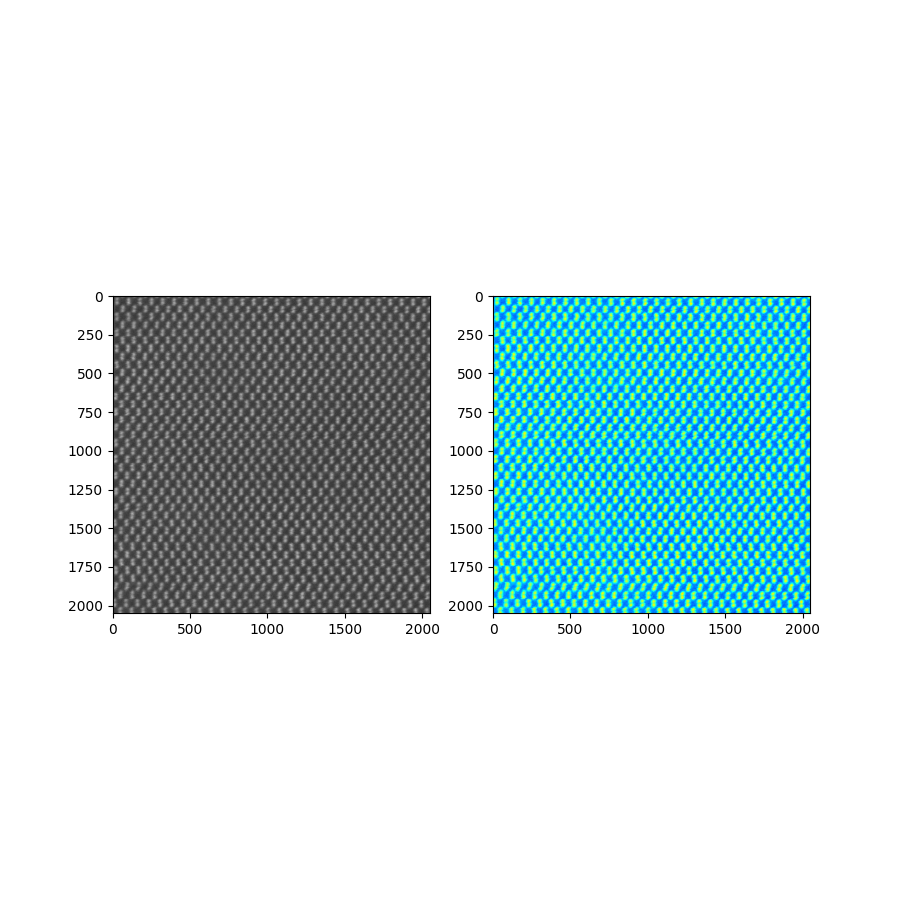

In [11]:
# Figure with two plots of the same image with two different colourmaps

fig = plt.figure(figsize=(9,9))
ax_left = fig.add_subplot(121)
ax_right = fig.add_subplot(122, sharex=ax_left, sharey=ax_left)
ax_left.imshow(image_array, cmap='gray')
ax_right.imshow(image_array, cmap='jet')

plt.show()

<IPython.core.display.Javascript object>


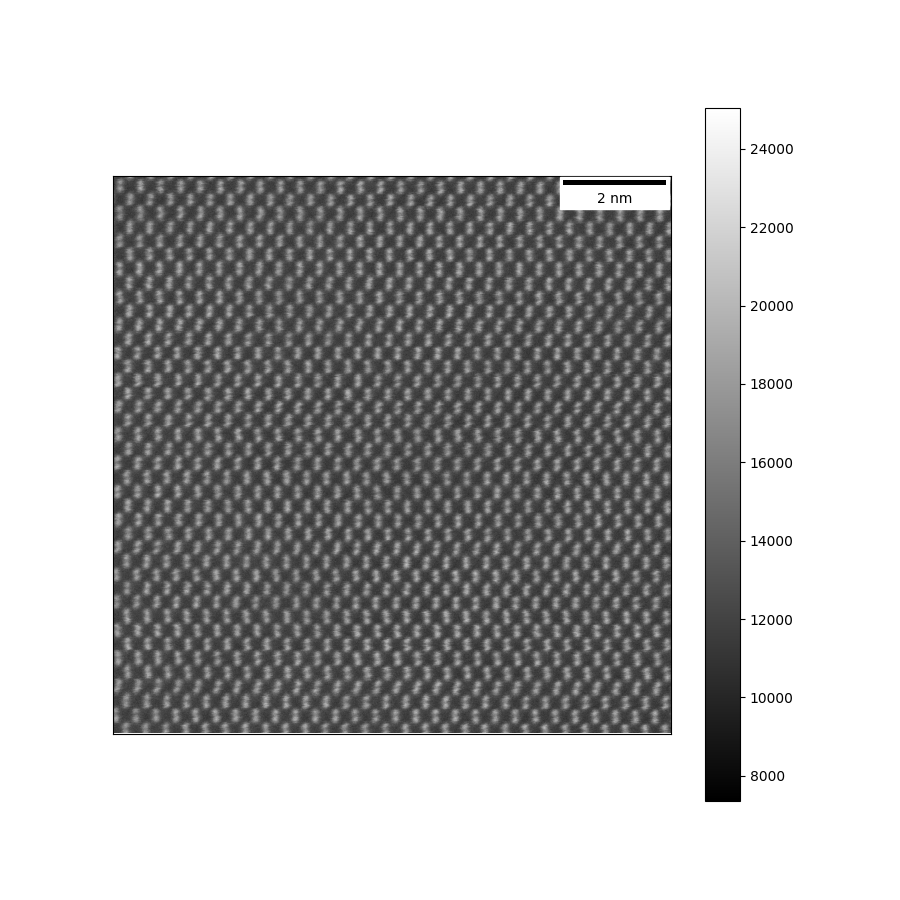

In [12]:
# Add colourbar and scalebar

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
im_disp = ax.imshow(image_array, cmap='gray')

# Create colorbar
plt.colorbar(im_disp, ax=ax)

# Create scalebar
scalebar = ScaleBar(5.28, "pm")
ax.add_artist(scalebar)

# Remove ticks and labels from image
ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)


plt.show()

<IPython.core.display.Javascript object>


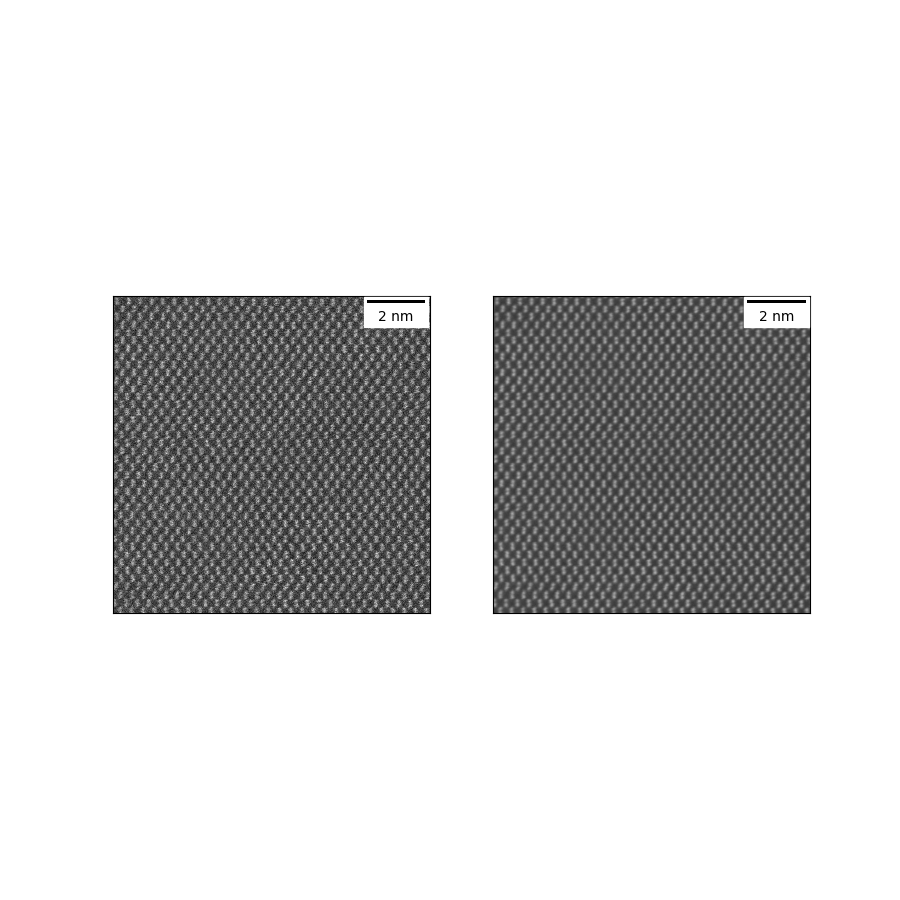

In [13]:
# Change interpolation between pixels for the image visualization

fig = plt.figure(figsize=(9,9))
ax_left = fig.add_subplot(121)
ax_right = fig.add_subplot(122, sharex=ax_left, sharey=ax_left)

im_left = ax_left.imshow(image_array, cmap='gray', interpolation='none')
im_right = ax_right.imshow(image_array, cmap='gray', interpolation='gaussian')


scalebar_left = ScaleBar(5.28, "pm")
scalebar_right = ScaleBar(5.28, "pm")
ax_left.add_artist(scalebar_left)
ax_right.add_artist(scalebar_right)

ax_left.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
ax_right.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)

plt.show()

<IPython.core.display.Javascript object>


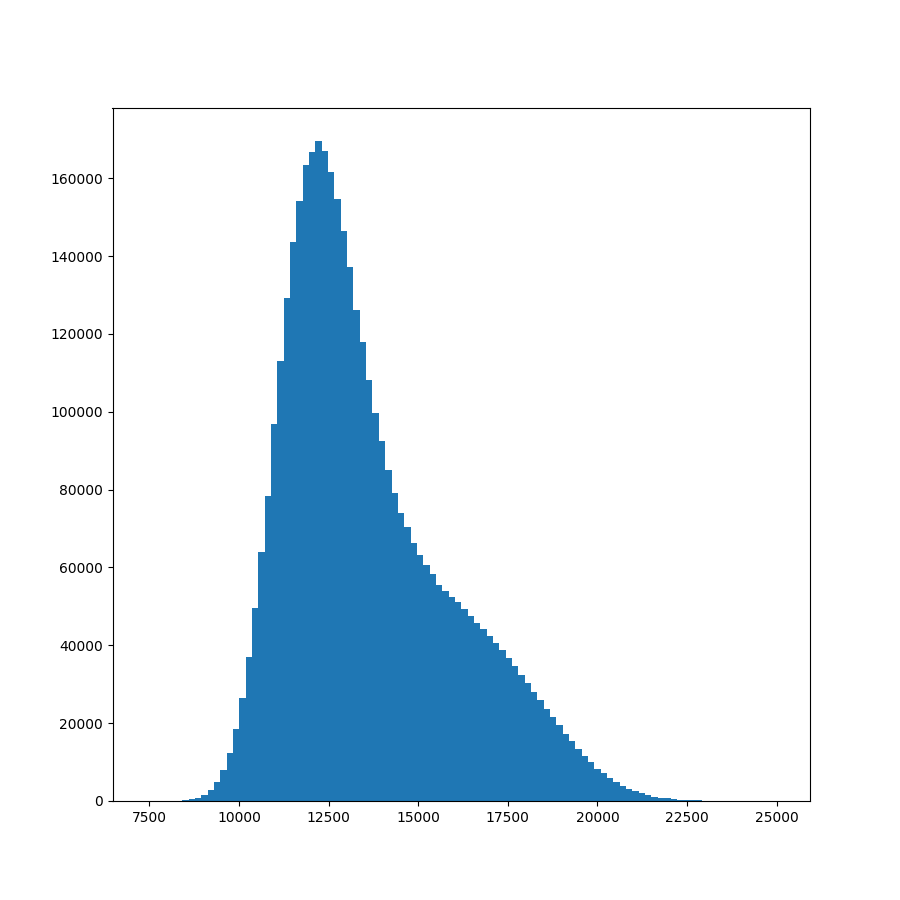

In [14]:
# Histogram plot

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.hist(image_array.ravel(), 100)

plt.show()

<IPython.core.display.Javascript object>


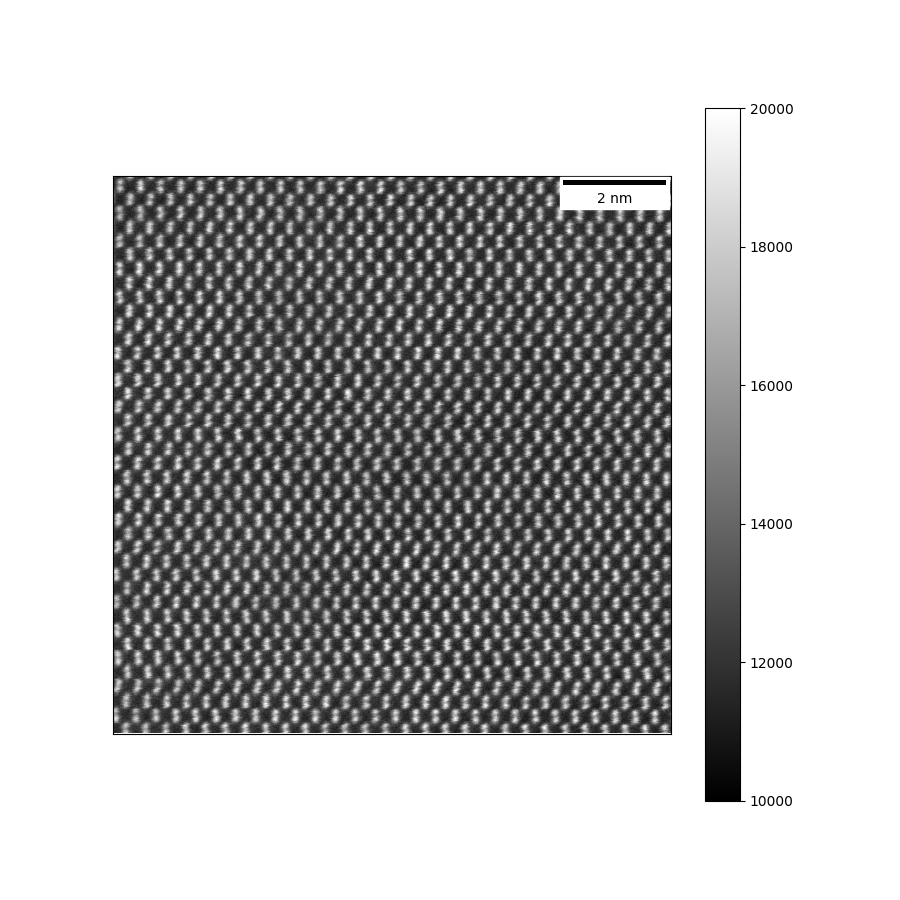

In [15]:
# Set contrast limit (threshold)

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
im_disp = ax.imshow(image_array, cmap='gray', clim=(10000, 20000)) # contrast limit (clim) keyword changed

# Create colorbar
plt.colorbar(im_disp, ax=ax)

# Create scalebar
scalebar = ScaleBar(5.28, "pm")
ax.add_artist(scalebar)

# Remove ticks and labels from image
ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

plt.show()

<IPython.core.display.Javascript object>


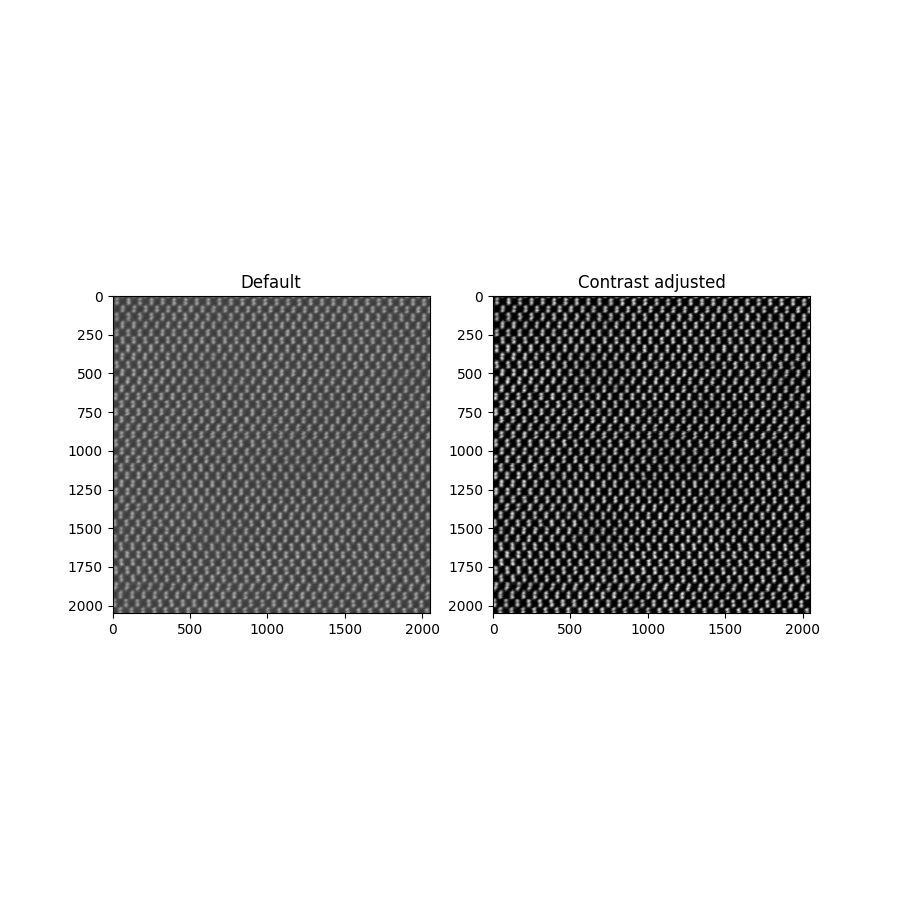

In [16]:
# Figure with two plots to visualize the difference between two contrast limit conditions in grayscale

fig = plt.figure(figsize=(9,9))
ax_left = fig.add_subplot(121)
ax_right = fig.add_subplot(122, sharex=ax_left, sharey=ax_left)
ax_left.imshow(image_array, cmap='gray')
ax_right.imshow(image_array, cmap='gray', clim=(12000, 20000))

ax_left.set_title('Default')
ax_right.set_title('Contrast adjusted')

plt.show()

<IPython.core.display.Javascript object>


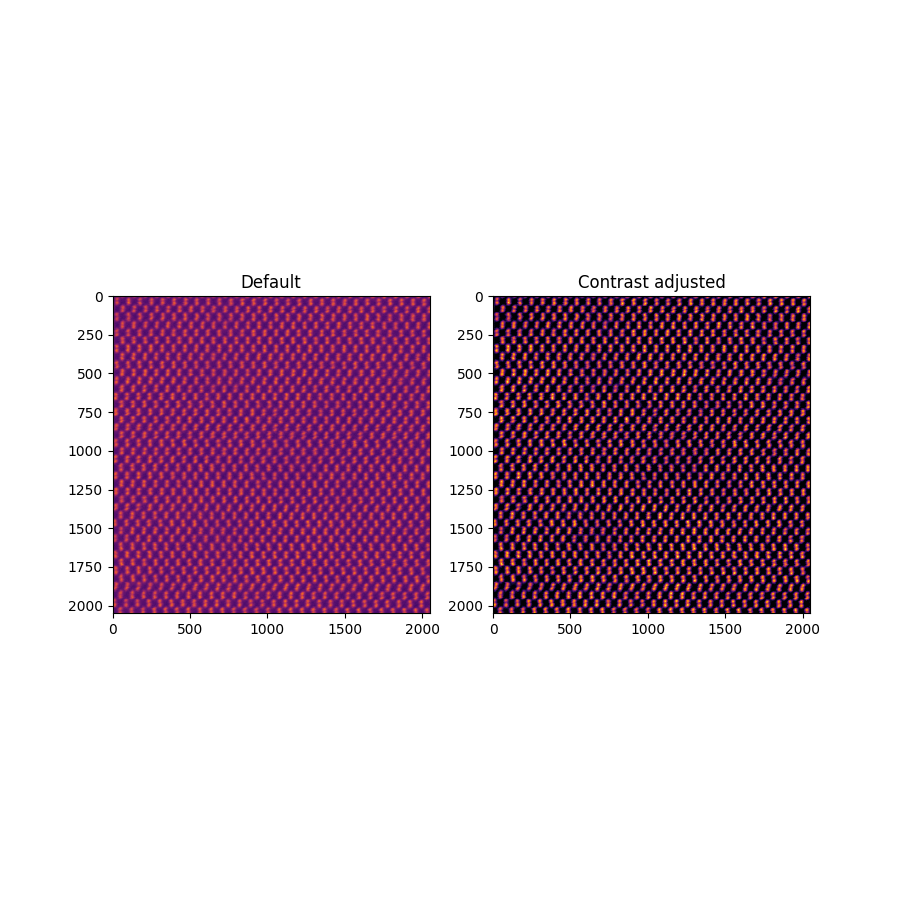

In [17]:
# Figure with two plots to visualize the difference between two contrast limit conditions with inferno colourmap

fig = plt.figure(figsize=(9,9))
ax_left = fig.add_subplot(121)
ax_right = fig.add_subplot(122, sharex=ax_left, sharey=ax_left)
ax_left.imshow(image_array, cmap='inferno')
ax_right.imshow(image_array, cmap='inferno', clim=(12000, 20000))

ax_left.set_title('Default')
ax_right.set_title('Contrast adjusted')

plt.show()

## Export data
1. Save image
2. Save figure


In [18]:
# Save Silicon image in .png

io.imwrite('Silicon_image.png', image_array)

# Save figure with silicon image, colobar and scalebar

plt.ioff() # Turn off temporarly the interactive plotting

fig_export = plt.figure(figsize=(3.3, 3.3)) # ACS Journals one column size
ax_export = fig_export.add_subplot(111)
im_export = ax_export.imshow(image_array, cmap='inferno', clim=(12000, 20000))
plt.colorbar(im_export, ax=ax_export, shrink=0.7)
scalebar_export = ScaleBar(5.28, "pm")
ax_export.add_artist(scalebar_export)
ax_export.tick_params(left=False, right=False , labelleft=False ,
                labelbottom=False, bottom=False)


fig_export.savefig('Silicon_figure.png', dpi=300)

plt.ion() # Turn back on the interactive plotting
plt.close(fig_export) # Remove the plot from the memory

*Exercise: Load your own image (2D array), display it with "blue white red" colormap using different contrast levels and export the figure.* 

(1024, 1280)


<IPython.core.display.Javascript object>


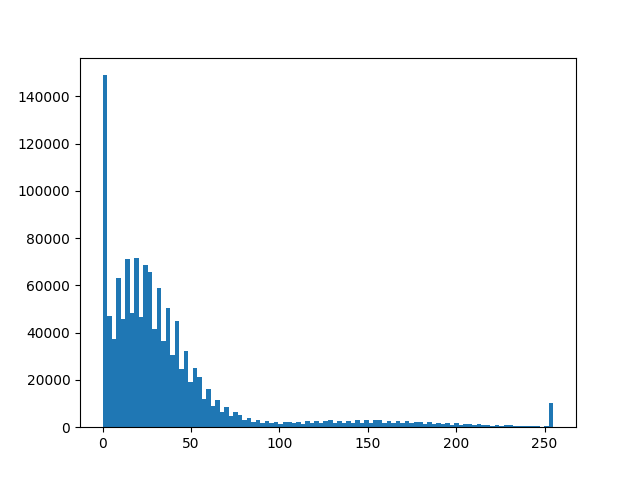

In [19]:
image_exercise = io.imread('ST1-Sq3_S7_(9,6).tif')
image_exercise_array = np.array(image_exercise)[:,:,2] # Warning the image has 3 channels (3D dataset), so here only one channel is considered

print(image_exercise_array.shape)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(image_exercise_array.ravel(),100)

plt.show()

<IPython.core.display.Javascript object>


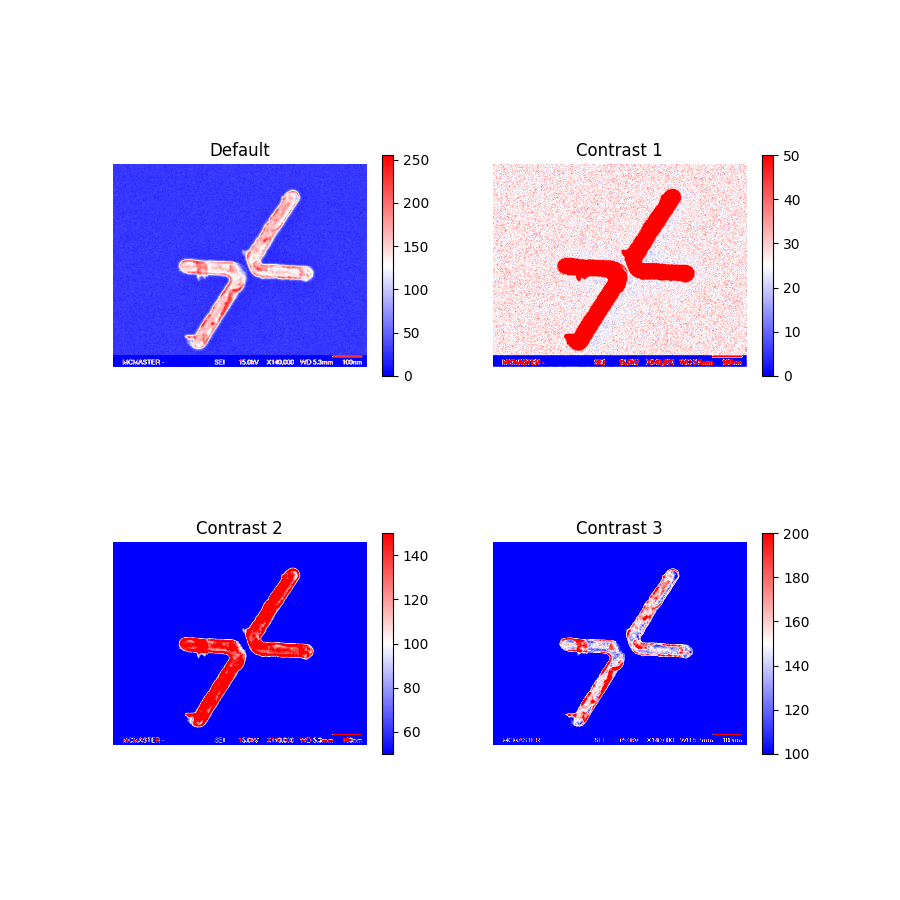

In [20]:
fig = plt.figure(figsize=(9,9))
ax_1 = fig.add_subplot(221)
ax_2 = fig.add_subplot(222, sharex=ax_1, sharey=ax_1)
ax_3 = fig.add_subplot(223, sharex=ax_1, sharey=ax_1)
ax_4 = fig.add_subplot(224, sharex=ax_1, sharey=ax_1)

im1 = ax_1.imshow(image_exercise_array, cmap='bwr')
im2 = ax_2.imshow(image_exercise_array, cmap='bwr', clim=(0,50))
im3 = ax_3.imshow(image_exercise_array, cmap='bwr', clim=(50,150))
im4 = ax_4.imshow(image_exercise_array, cmap='bwr', clim=(100,200))

ax_1.set_title('Default')
ax_2.set_title('Contrast 1')
ax_3.set_title('Contrast 2')
ax_4.set_title('Contrast 3')

ax_1.axis('off')
ax_2.axis('off')
ax_3.axis('off')
ax_4.axis('off')

plt.colorbar(im1, ax=ax_1, shrink=0.7)
plt.colorbar(im2, ax=ax_2, shrink=0.7)
plt.colorbar(im3, ax=ax_3, shrink=0.7)
plt.colorbar(im4, ax=ax_4, shrink=0.7)

fig.savefig('figure_exercise_EM.png')

plt.show()

In [21]:
image_exercise = io.imread('blobs.tif')
image_exercise_array = np.array(image_exercise)

print(image_exercise_array.shape)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(image_exercise_array.ravel(),100)

plt.show()

(254, 256)


<IPython.core.display.Javascript object>

In [22]:
fig = plt.figure(figsize=(9,9))
ax_1 = fig.add_subplot(221)
ax_2 = fig.add_subplot(222, sharex=ax_1, sharey=ax_1)
ax_3 = fig.add_subplot(223, sharex=ax_1, sharey=ax_1)
ax_4 = fig.add_subplot(224, sharex=ax_1, sharey=ax_1)

im1 = ax_1.imshow(image_exercise_array, cmap='bwr')
im2 = ax_2.imshow(image_exercise_array, cmap='bwr', clim=(28,75))
im3 = ax_3.imshow(image_exercise_array, cmap='bwr', clim=(100,170))
im4 = ax_4.imshow(image_exercise_array, cmap='bwr', clim=(185,235))

ax_1.set_title('Default')
ax_2.set_title('Contrast 1')
ax_3.set_title('Contrast 2')
ax_4.set_title('Contrast 3')

ax_1.axis('off')
ax_2.axis('off')
ax_3.axis('off')
ax_4.axis('off')

plt.colorbar(im1, ax=ax_1, shrink=0.7)
plt.colorbar(im2, ax=ax_2, shrink=0.7)
plt.colorbar(im3, ax=ax_3, shrink=0.7)
plt.colorbar(im4, ax=ax_4, shrink=0.7)

fig.savefig('figure_exercise_OM.png')

plt.show()

<IPython.core.display.Javascript object>